### Problem:
    To find the cost efficient mobile recharge.

### Prepare and Process

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
voice_plans = pd.read_csv("./data/2023_04_28_recharge_plans_raw_data - voice plans.csv")
data_plans = pd.read_csv("./data/2023_04_28_recharge_plans_raw_data - data plans.csv")

In [4]:
voice_plans.sort_values(by=["network","plan_cost"],inplace=True)
data_plans.sort_values(by=["network","plan_cost"],inplace=True)

In [5]:
voice_plans["daily_data"] = round(
    voice_plans["data_per_day"]
    + voice_plans["additional_data"] / voice_plans["validity"],
    2,
)
voice_plans["monthly_data"] = round(voice_plans["daily_data"] * 365 / 12, 2)
voice_plans["yearly_data"] = round(voice_plans["daily_data"] * 365, 2)

voice_plans["daily_sms"] = round(
    voice_plans["sms_per_day"]
    + voice_plans["additional_sms"] / voice_plans["validity"],
    2,
)
voice_plans["monthly_sms"] = round(voice_plans["daily_sms"] * 365 / 12, 2)
voice_plans["yearly_sms"] = round(voice_plans["daily_sms"] * 365, 2)

voice_plans["daily_cost"] = round(voice_plans["plan_cost"] / voice_plans["validity"], 2)
voice_plans["monthly_cost"] = round(voice_plans["daily_cost"] * 365 / 12, 2)
voice_plans["yearly_cost"] = round(voice_plans["daily_cost"] * 365, 2)

data_plans["cost_per_gb"] = round(
    data_plans["plan_cost"]
    / (
        data_plans["data_per_day"] * data_plans["validity"]
        + data_plans["additional_data"]
    ),
    2,
)
data_plans["total_data"] = (
    data_plans["data_per_day"] * data_plans["validity"] + data_plans["additional_data"]
)

In [6]:
voice_plans.to_csv("./output/2023_04_28_recharge_plans - voice plans.csv",index=False)
data_plans.to_csv("./output/2023_04_28_recharge_plans - data plans.csv",index=False)

#### Choosing plans with lowest cost

In [7]:
data_needed = [0, 0.5, 1, 1.5, 2, 2.5, 3]

In [8]:
top_voice_plans = voice_plans.groupby(["network"]).apply(lambda x:x.sort_values(by=["yearly_cost"]).head(1)).sort_values(by="yearly_cost")
top_voice_plans.reset_index(drop=True,inplace=True)
top_voice_plans

,network,plan_cost,validity,data_per_day,sms_per_day,additional_data,additional_sms,daily_data,monthly_data,yearly_data,daily_sms,monthly_sms,yearly_sms,daily_cost,monthly_cost,yearly_cost
0,jio,1559,336.0,0.0,0,24.0,3600,0.07,2.13,25.55,10.71,325.76,3909.15,4.64,141.13,1693.60
1,airtel,1799,365.0,0.0,0,24.0,3600,0.07,2.13,25.55,9.86,299.91,3598.90,4.93,149.95,1799.45
2,vi,1799,365.0,0.0,0,24.0,3600,0.07,2.13,25.55,9.86,299.91,3598.90,4.93,149.95,1799.45


In [9]:
for data in data_needed:
    print("Best plan for",data,"gb daily need")
    plans = voice_plans[voice_plans["daily_data"]>=data].groupby(["network"]).apply(lambda x:x.sort_values(by=["yearly_cost"]).head(1)).sort_values(by="yearly_cost")
    plans.reset_index(drop=True,inplace=True)
    plans.set_index(["network"])
    display(plans)

Best plan for 0 gb daily need


,network,plan_cost,validity,data_per_day,sms_per_day,additional_data,additional_sms,daily_data,monthly_data,yearly_data,daily_sms,monthly_sms,yearly_sms,daily_cost,monthly_cost,yearly_cost
0,jio,1559,336.0,0.0,0,24.0,3600,0.07,2.13,25.55,10.71,325.76,3909.15,4.64,141.13,1693.60
1,airtel,1799,365.0,0.0,0,24.0,3600,0.07,2.13,25.55,9.86,299.91,3598.90,4.93,149.95,1799.45
2,vi,1799,365.0,0.0,0,24.0,3600,0.07,2.13,25.55,9.86,299.91,3598.90,4.93,149.95,1799.45


Best plan for 0.5 gb daily need


,network,plan_cost,validity,data_per_day,sms_per_day,additional_data,additional_sms,daily_data,monthly_data,yearly_data,daily_sms,monthly_sms,yearly_sms,daily_cost,monthly_cost,yearly_cost
0,jio,149,20.0,1.0,100,0.0,0,1.0,30.42,365.0,100.0,3041.67,36500.0,7.45,226.60,2719.25
1,vi,2899,365.0,1.5,100,0.0,0,1.5,45.62,547.5,100.0,3041.67,36500.0,7.94,241.51,2898.10
2,airtel,2999,365.0,2.0,100,0.0,0,2.0,60.83,730.0,100.0,3041.67,36500.0,8.22,250.02,3000.30


Best plan for 1 gb daily need


,network,plan_cost,validity,data_per_day,sms_per_day,additional_data,additional_sms,daily_data,monthly_data,yearly_data,daily_sms,monthly_sms,yearly_sms,daily_cost,monthly_cost,yearly_cost
0,jio,149,20.0,1.0,100,0.0,0,1.0,30.42,365.0,100.0,3041.67,36500.0,7.45,226.60,2719.25
1,vi,2899,365.0,1.5,100,0.0,0,1.5,45.62,547.5,100.0,3041.67,36500.0,7.94,241.51,2898.10
2,airtel,2999,365.0,2.0,100,0.0,0,2.0,60.83,730.0,100.0,3041.67,36500.0,8.22,250.02,3000.30


Best plan for 1.5 gb daily need


,network,plan_cost,validity,data_per_day,sms_per_day,additional_data,additional_sms,daily_data,monthly_data,yearly_data,daily_sms,monthly_sms,yearly_sms,daily_cost,monthly_cost,yearly_cost
0,jio,2545,336.0,1.5,100,0.0,0,1.5,45.62,547.5,100.0,3041.67,36500.0,7.57,230.25,2763.05
1,vi,2899,365.0,1.5,100,0.0,0,1.5,45.62,547.5,100.0,3041.67,36500.0,7.94,241.51,2898.10
2,airtel,2999,365.0,2.0,100,0.0,0,2.0,60.83,730.0,100.0,3041.67,36500.0,8.22,250.02,3000.30


Best plan for 2 gb daily need


,network,plan_cost,validity,data_per_day,sms_per_day,additional_data,additional_sms,daily_data,monthly_data,yearly_data,daily_sms,monthly_sms,yearly_sms,daily_cost,monthly_cost,yearly_cost
0,jio,2999,388.0,2.5,100,75.0,0,2.69,81.82,981.85,100.0,3041.67,36500.0,7.73,235.12,2821.45
1,airtel,2999,365.0,2.0,100,0.0,0,2.00,60.83,730.00,100.0,3041.67,36500.0,8.22,250.02,3000.30
2,vi,2999,365.0,0.0,100,850.0,0,2.33,70.87,850.45,100.0,3041.67,36500.0,8.22,250.02,3000.30


Best plan for 2.5 gb daily need


,network,plan_cost,validity,data_per_day,sms_per_day,additional_data,additional_sms,daily_data,monthly_data,yearly_data,daily_sms,monthly_sms,yearly_sms,daily_cost,monthly_cost,yearly_cost
0,jio,2999,388.0,2.5,100,75.0,0,2.69,81.82,981.85,100.0,3041.67,36500.0,7.73,235.12,2821.45
1,airtel,3359,365.0,2.5,100,0.0,0,2.50,76.04,912.50,100.0,3041.67,36500.0,9.20,279.83,3358.00
2,vi,699,56.0,3.0,100,0.0,0,3.00,91.25,1095.00,100.0,3041.67,36500.0,12.48,379.60,4555.20


Best plan for 3 gb daily need


,network,plan_cost,validity,data_per_day,sms_per_day,additional_data,additional_sms,daily_data,monthly_data,yearly_data,daily_sms,monthly_sms,yearly_sms,daily_cost,monthly_cost,yearly_cost
0,jio,999,84.0,3.0,100,40.0,0,3.48,105.85,1270.2,100.0,3041.67,36500.0,11.89,361.65,4339.85
1,airtel,699,56.0,3.0,100,0.0,0,3.00,91.25,1095.0,100.0,3041.67,36500.0,12.48,379.60,4555.20
2,vi,699,56.0,3.0,100,0.0,0,3.00,91.25,1095.0,100.0,3041.67,36500.0,12.48,379.60,4555.20


#### We need to check if data provided with voice plans are cheaper than seperate data plans
We are finding the cost of data provided with voice plans and comparing with cheapest data plan provided for each network

In [40]:
plan_change_data = pd.DataFrame(
    {
        "network": [],
        "from_data_need": [],
        "to_data_need": [],
        "yearly_cost_diff": [],
        "cost_per_gb": [],
    }
)
best_plans = pd.DataFrame(
    {
        "network": [],
        "category": [],
        "plan_cost": [],
    }
)
for network in voice_plans["network"].unique():
    plans = []
    for data in data_needed:
        plan = (
            voice_plans[
                (voice_plans["daily_data"] >= data)
                & (voice_plans["network"] == network)
            ]
            .sort_values(by=["yearly_cost"])
            .head(1)
        )
        plans.append(plan)
        best_plans.loc[len(best_plans)] = [plan["network"].values[0], data, plan["plan_cost"].values[0]]

    for i in range(len(plans) - 1):
        for j in range(i + 1, len(plans)):
            yearly_cost_diff, cost_per_gb = 0, 0
            if plans[i]["plan_cost"].values[0] != plans[j]["plan_cost"].values[0]:
                yearly_cost_diff = round(
                    abs(
                        plans[i]["yearly_cost"].values[0]
                        - plans[j]["yearly_cost"].values[0]
                    ),
                    2,
                )
                cost_per_gb = round(
                    yearly_cost_diff
                    / (
                        abs(
                            plans[i]["daily_data"].values[0]
                            - plans[j]["daily_data"].values[0]
                        )
                        * 365
                    ),
                    2,
                )

            # print(
            #     network, data_needed[i], data_needed[j], plan_cost_diff, data_cost
            # )
            plan_change_data.loc[len(plan_change_data)] = [
                network,
                data_needed[i],
                data_needed[j],
                yearly_cost_diff,
                cost_per_gb,
            ]
plan_change_data.to_csv(
    "./output/2023_04_28_recharge_plans - data plans - plan comparison.csv", index=False
)
best_plans.to_csv("./output/2023_04_28_recharge_plans - best plans.csv", index=False)

In [11]:
data_plans.groupby(["network"]).apply(lambda x:x.sort_values(by=["cost_per_gb"]).head(1)).sort_values(by="cost_per_gb")

,,network,plan_cost,data_per_day,additional_data,validity,cost_per_gb,total_data
network,,,,,,,,
jio,22,jio,2998,2.5,0.0,365,3.29,912.5
vi,36,vi,418,0.0,100.0,56,4.18,100.0
airtel,9,airtel,301,0.0,50.0,0,6.02,50.0


In [12]:
data = data_plans[data_plans["validity"] != 0].copy()
data["daily_data"] = round(data["total_data"]/data["validity"],2)
data["daily_cost"] = round(data["plan_cost"]/data["validity"])
data["daily_1gb_cost"] = round(data["daily_cost"]/data["daily_data"],2)
display(data)
agg = data.groupby(["network"])["daily_1gb_cost"].min().to_frame("daily_1gb_cost").reset_index()
agg

,network,plan_cost,data_per_day,additional_data,validity,cost_per_gb,total_data,daily_data,daily_cost,daily_1gb_cost
0,airtel,19,0.0,1.0,1,19.00,1.0,1.00,19.0,19.00
1,airtel,29,0.0,2.0,1,14.50,2.0,2.00,29.0,14.50
8,airtel,181,1.0,0.0,30,6.03,30.0,1.00,6.0,6.00
14,jio,181,0.0,30.0,30,6.03,30.0,1.00,6.0,6.00
16,jio,241,0.0,40.0,30,6.02,40.0,1.33,8.0,6.02
17,jio,301,0.0,50.0,30,6.02,50.0,1.67,10.0,5.99
18,jio,444,0.0,100.0,60,4.44,100.0,1.67,7.0,4.19
19,jio,555,0.0,55.0,55,10.09,55.0,1.00,10.0,10.00
20,jio,667,0.0,150.0,90,4.45,150.0,1.67,7.0,4.19
21,jio,2878,2.0,0.0,365,3.94,730.0,2.00,8.0,4.00


,network,daily_1gb_cost
0,airtel,6.00
1,jio,3.20
2,vi,3.91


In [13]:
data_plans[data_plans["validity"] == 0].copy()

,network,plan_cost,data_per_day,additional_data,validity,cost_per_gb,total_data
2,airtel,58,0.0,3.0,0,19.33,3.0
3,airtel,65,0.0,4.0,0,16.25,4.0
4,airtel,98,0.0,5.0,0,19.60,5.0
5,airtel,118,0.0,12.0,0,9.83,12.0
6,airtel,148,0.0,15.0,0,9.87,15.0
7,airtel,149,0.0,1.0,0,149.00,1.0
9,airtel,301,0.0,50.0,0,6.02,50.0
10,jio,15,0.0,1.0,0,15.00,1.0
11,jio,25,0.0,2.0,0,12.50,2.0
12,jio,61,0.0,6.0,0,10.17,6.0


In [14]:
data = data_plans[data_plans["validity"] == 0].copy()
data.groupby(["network"])["cost_per_gb"].min()

network
airtel    6.02
jio       4.44
Name: cost_per_gb, dtype: float64

### Its better to choose voice plans with inbuilt data than to choose seperate data plans 

### Overall winner jio for cheap plans in both voice and data

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
palette=['#e7a801', '#ce1141','#13274f']

Text(0.5, 1.0, 'Number of voice plans per network')

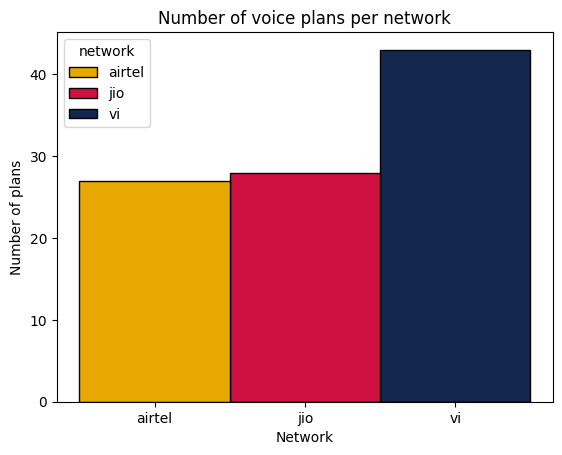

In [17]:
sns.histplot(voice_plans,x="network",hue="network",palette=palette,alpha=1)
plt.xlabel('Network')
plt.ylabel('Number of plans')
plt.title('Number of voice plans per network')

Text(0.5, 1.0, 'Number of data plans per network')

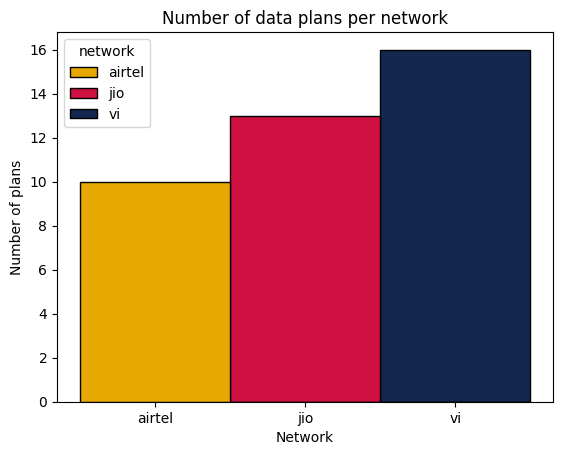

In [18]:
sns.histplot(data_plans,x="network",hue="network",palette=palette,alpha=1)
plt.xlabel('Network')
plt.ylabel('Number of plans')
plt.title('Number of data plans per network')

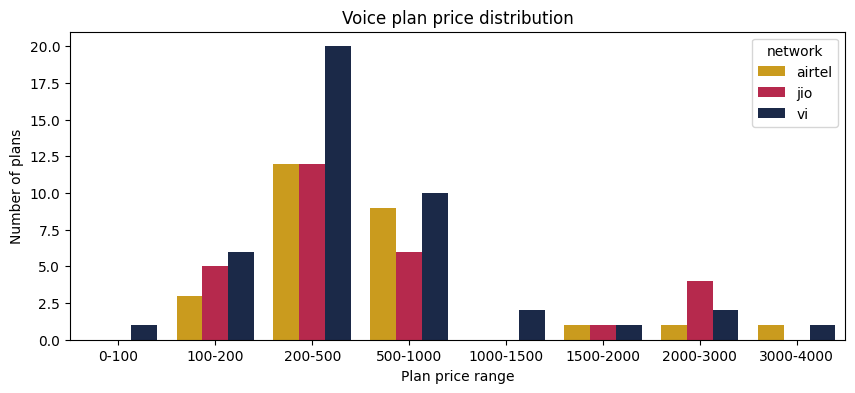

In [19]:
plans = voice_plans[["network","plan_cost"]].copy()
ranges = [0,100,200,500,1000,1500,2000,3000,4000]
plans["range"] = pd.cut(plans["plan_cost"], ranges, labels = ('0-100' ,'100-200', '200-500', '500-1000','1000-1500','1500-2000','2000-3000','3000-4000'))
fig,_ = plt.subplots(figsize=(10,4))
data = plans.groupby(["network","range"]).count().reset_index()
data["plan_cost"] = data["plan_cost"].astype(int)
viz = sns.barplot(data,x="range",y="plan_cost",hue="network",palette=palette)
plt.xlabel('Plan price range')
plt.ylabel('Number of plans')
plt.title('Voice plan price distribution')

data.to_csv("./output/2023_04_28_recharge_plans - voice plans - price distribution.csv",index=False)

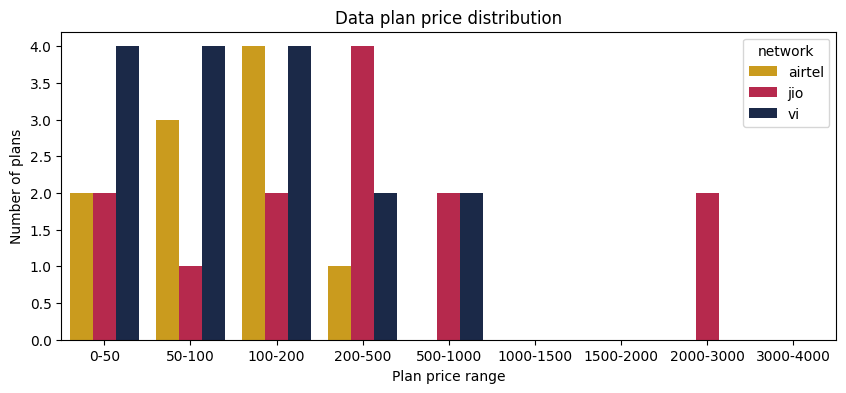

In [20]:
plans = data_plans[["network","plan_cost"]].copy()
ranges = [0,50,100,200,500,1000,1500,2000,3000,4000]
plans["range"] = pd.cut(plans["plan_cost"], ranges, labels = ('0-50','50-100' ,'100-200', '200-500', '500-1000','1000-1500','1500-2000','2000-3000','3000-4000'))
fig,_ = plt.subplots(figsize=(10,4))
data = plans.groupby(["network","range"]).count().reset_index()
data["plan_cost"] = data["plan_cost"].astype(int)
viz = sns.barplot(data,x="range",y="plan_cost",hue="network",palette=palette)
plt.xlabel('Plan price range')
plt.ylabel('Number of plans')
plt.title('Data plan price distribution')

data.to_csv("./output/2023_04_28_recharge_plans - data plans - price distribution.csv",index=False)

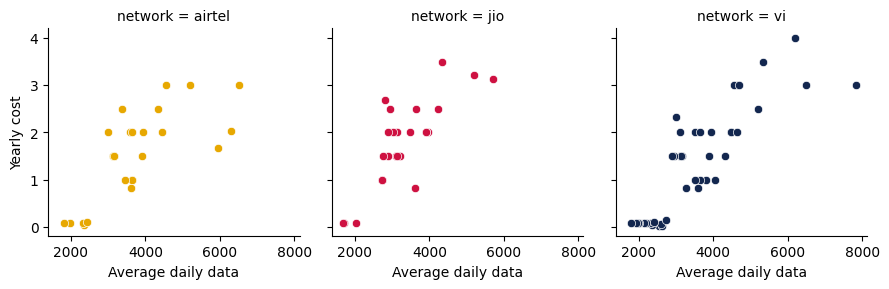

In [21]:
plot = sns.FacetGrid(data=voice_plans, col="network", hue="network", palette=palette)
plot.map_dataframe(
    func=sns.scatterplot,
    x="yearly_cost",
    y="daily_data",
)
plot.set_ylabels('Yearly cost')
plot.set_xlabels('Average daily data')

In [22]:
import numpy as np

In [23]:
data_needed

[0, 0.5, 1, 1.5, 2, 2.5, 3]

In [37]:

f = 0
colors = {
    'airtel':'#1e81b0',
    'jio':'darkblue',
    'vi':'darkorange'
}
for network in voice_plans.network.unique():
    fig, ax = plt.subplots()
    matrix = [[0 for i in range(len(data_needed))] for j in range(len(data_needed))]
    for i in range(len(data_needed) - 1):
        for j in range(i + 1, len(data_needed)):
            # print(i,j)
            value = plan_change_data[
                (plan_change_data["network"] == network)
                & (plan_change_data["from_data_need"] == data_needed[i])
                & (plan_change_data["to_data_need"] == data_needed[j])
            ]["yearly_cost_diff"].values[0]
            matrix[i][j] = round(value) if value else 0
            # matrix[j][i] = -round(value) if value else 0
    # print(matrix)
    array = np.array(matrix)
    mask = np.tril(np.ones_like(array, dtype=bool))

    plot = sns.heatmap(
        array,
        annot=True,
        fmt='g',
        # ax=ax[f],
        mask=mask,
        cmap=sns.color_palette("rocket_r", as_cmap=True),
        xticklabels=data_needed,
        yticklabels=data_needed,
    )
    ax.set_xlabel("To data need",fontsize=12)
    ax.set_ylabel("From data need",fontsize=12)
    # ax.set_title(network,fontsize=18,color=colors[network])
    # f += 1
    plt.savefig("./output/"+network+"_heatmap.jpg")
    plt.close()